# Implementation of cost function in a model with real world Data

### Problem Defination
we have a data of various vehicls of a town with same milege. where fuel consumed by a vehicle and distance covered by it were measured. now lets take the data and  try to predict the distance traveled by the vehicle based on amount of fuel consumed.

at first lets import necessary modules

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

now we have all the necessary modules. Lets start by importing the data. 

In [ ]:
data = pd.read_csv("./../data/slReg/fuleconsumedxdistance.csv")
data.head()

In [ ]:
X = data["Fuel_Consumed_Liters"]
y = data["Distance_Traveled_km"]
X.shape

### Ploting the data

In [ ]:
data.plot(kind="scatter", x="Fuel_Consumed_Liters",y="Distance_Traveled_km", color = "blue")
plt.show()

### Cost function :

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

***pseudo code :***
```
m = number of training examples  
total_cost = 0  
iterate {  
  f_wb = w * x_i + b  
  cost = (f_wb - y_i)**2  
  total_cost += cost  
}
total_cost /= 2 * m  
return total_cost  
```


In [87]:
def compute_cost(X,y,w,b):
    m = X.shape[0]
    total_cost = 0
    #your code starts here

    #your code ends here
    return total_cost;

using gradient descent

In [88]:

def gradient_descent(X, y, w, b, learning_rate, iterations, cost_function):
    m = X.shape[0]
    cost_history = []

    for i in range(iterations):
        predictions = w * X + b

        dw = (1 / m) * np.sum((predictions - y) * X)
        db = (1 / m) * np.sum(predictions - y)

        w -= learning_rate * dw
        b -= learning_rate * db

        cost = cost_function(X, y, w, b)
        cost_history.append(cost)

        if i % 500 == 0:
            print(f"Iteration {i}: Cost {cost:.4f}, w {w:.4f}, b {b:.4f}")

    return w, b, cost_history

splitting the dataset using trining set and test set

In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

training the model

In [90]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 20000
tmp_alpha = 0.001

w_final, b_final, J_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, iterations, compute_cost)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration 0: Cost 0.0000, w 6.4735, b 0.2525
Iteration 500: Cost 0.0000, w 11.1460, b 8.4145
Iteration 1000: Cost 0.0000, w 10.8902, b 15.4491
Iteration 1500: Cost 0.0000, w 10.6647, b 21.6491
Iteration 2000: Cost 0.0000, w 10.4660, b 27.1135
Iteration 2500: Cost 0.0000, w 10.2908, b 31.9295
Iteration 3000: Cost 0.0000, w 10.1364, b 36.1742
Iteration 3500: Cost 0.0000, w 10.0004, b 39.9152
Iteration 4000: Cost 0.0000, w 9.8805, b 43.2124
Iteration 4500: Cost 0.0000, w 9.7748, b 46.1184
Iteration 5000: Cost 0.0000, w 9.6816, b 48.6796
Iteration 5500: Cost 0.0000, w 9.5995, b 50.9369
Iteration 6000: Cost 0.0000, w 9.5272, b 52.9264
Iteration 6500: Cost 0.0000, w 9.4634, b 54.6798
Iteration 7000: Cost 0.0000, w 9.4072, b 56.2253
Iteration 7500: Cost 0.0000, w 9.3577, b 57.5873
Iteration 8000: Cost 0.0000, w 9.3140, b 58.7878
Iteration 8500: Cost 0.0000, w 9.2755, b 59.8458
Iteration 9000: Cost 0.0000, w 9.2416, b 60.7783
Iteration 9500: Cost 0.0000, w 9.2117, b 61.6002
Iteration 10000: Co

plotting the cost x iteration

ValueError: x and y must have same first dimension, but have shapes (50,) and (20000,)

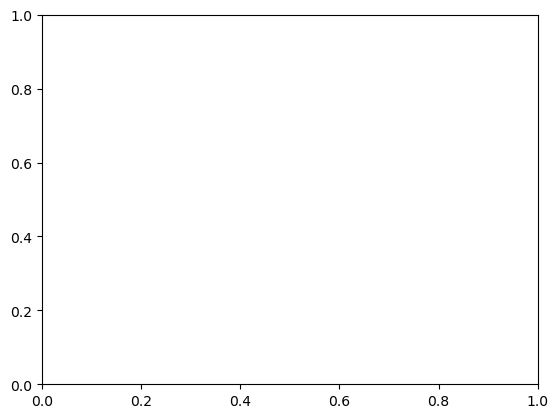

In [91]:
x_ = np.linspace(1,len(J_hist))
plt.plot(x_,J_hist)
plt.title("Cost over iteration")
plt.show()

plotting the data and our regression line with training and test set

In [ ]:
x_line = np.linspace(min(X),max(X),100)
y_line = w_final * x_line + b_final
plt.scatter(x_train,y_train,color = "blue")
plt.plot(x_line,y_line,color = "red")
plt.title("Plotting regression line in training set")
# plt.xlabel("Fuel consumed in litre")
# plt.ylabel("Distance traveled in km")
plt.show()

In [ ]:
plt.scatter(x_train,y_train,color = "orange")
plt.plot(x_line,y_line,color = "green")
plt.title("Plotting regression line in test set")
plt.show()

In [64]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

evaluation of the model

In [ ]:
y_pred = w_final * x_test + b_final
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")
